<a href="https://colab.research.google.com/github/ShreyasKadiri/Machine_Learning/blob/main/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle


Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        146           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        279           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        840           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       4705           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      38820            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      10224            True  
connectx

In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:

!ls

gender_submission.csv  output	    test.csv	 train.csv
MySubmissionCabin      sample_data  titanic.zip


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
print("#Age missing entries =",df.Age.isnull().sum())
print("#survived missing entries =",df.Survived.isnull().sum())
print("#Pclass missing entries =",df.Pclass.isnull().sum())
print("#SibSp missing entries =",df.SibSp.isnull().sum())
print("#Parch missing entries =",df.Parch.isnull().sum())
print("#Fare missing entries =",df.Fare.isnull().sum())
print("#Cabin missing entries =",df.Cabin.isnull().sum())
print("#Embarked missing entries =",df.Embarked.isnull().sum())

#Age missing entries = 177
#survived missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 0
#Cabin missing entries = 687
#Embarked missing entries = 2


In [ ]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


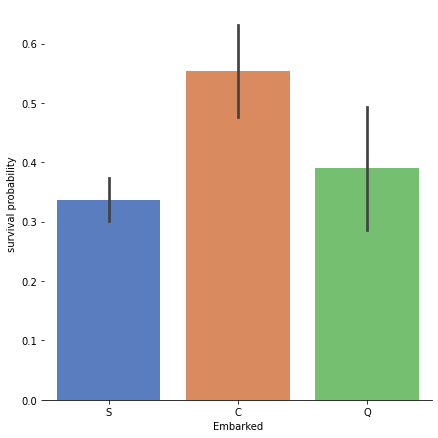

In [ ]:
g = sns.catplot(x="Embarked", y="Survived",  data=df, height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [ ]:
df = df.fillna({'Embarked':'C'})

In [ ]:
print("#Embarked missing entries =",df.Embarked.isnull().sum())

#Embarked missing entries = 0


In [ ]:
df = df.fillna({"Cabin":'X'})

In [ ]:
df["Cabin"] = df["Cabin"].str.slice(0,1)

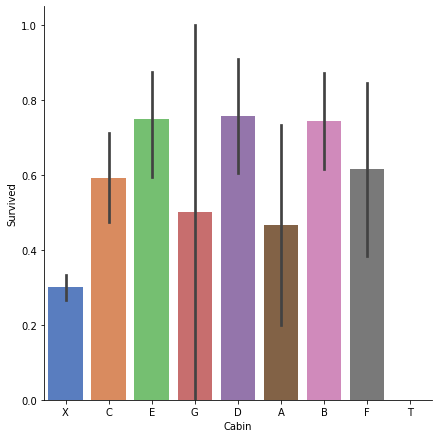

In [ ]:
plot1=sns.catplot(x="Cabin", y="Survived",  data=df, height=6, kind="bar", palette="muted")

In [ ]:
df['Cabin'] = df['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])

In [ ]:
# Converting other categorical features as well.
df['Sex'] = df['Sex'].replace(['male','female'],[0,1])
df['Embarked'] = df['Embarked'].replace(['S','C','Q'],[0,1,2])

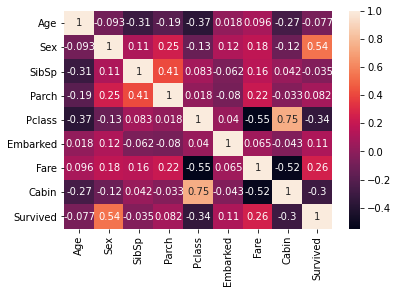

In [ ]:
sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass","Embarked","Fare","Cabin","Survived"]].corr(),annot=True)

In [ ]:

age_means=np.zeros((3,9))
median=df.Age.mean()
for classNum in range (0,df.Pclass.max()):  # 0 --> 1st class
    for sibNum in range (0,df.SibSp.max()+1): # adding one to take the range [0,8] not [0,8[.
        age_means[classNum][sibNum]=df["Age"][(df["Pclass"]==(classNum+1)) & (df["SibSp"]==sibNum)].mean()
        if np.isnan(age_means[classNum][sibNum]):
            age_means[classNum][sibNum]=median

In [ ]:
Null_indx=list(df["Age"][df["Age"].isnull()].index)

In [ ]:
for i in Null_indx:
    df["Age"].iloc[i]=age_means[df.Pclass[i] - 1][df.SibSp[i]]
    
print("#Age missing entries =",df.Age.isnull().sum())

#Age missing entries = 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:

Y=df.Survived
X=df
X.drop(['Survived'],axis=1,inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=3)

In [ ]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicts=classifier.predict(X_test)

In [ ]:
#Get report
print(classification_report(Y_test, predicts))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       109
           1       0.66      0.66      0.66        70

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



In [ ]:
#Creating the submission file

In [ ]:
test=pd.read_csv('test.csv')
IDs=test.PassengerId
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
test.Sex=test.Sex.replace(['male','female'],[0,1])
test.Embarked=test.Embarked.replace(['S','C','Q'],[0,1,2])
test=test.fillna({"Cabin":'X'})
test["Cabin"]=test["Cabin"].str.slice(0,1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,X,2
1,3,1,47.0,1,0,7.0000,X,0
2,2,0,62.0,0,0,9.6875,X,2
3,3,0,27.0,0,0,8.6625,X,0
4,3,1,22.0,1,1,12.2875,X,0


In [ ]:
Null_test=list(test["Age"][test["Age"].isnull()].index)
for i in Null_test:
    test["Age"].iloc[i]=age_means[test.Pclass[i] - 1][test.SibSp[i]]
print("#Age missing entries =",df.Age.isnull().sum())
print("#Pclass missing entries =",test.Pclass.isnull().sum())
print("#SibSp missing entries =",test.SibSp.isnull().sum())
print("#Parch missing entries =",test.Parch.isnull().sum())
print("#Fare missing entries =",test.Fare.isnull().sum())
print("#Embarked missing entries =",test.Embarked.isnull().sum())

#Age missing entries = 0
#Pclass missing entries = 0
#SibSp missing entries = 0
#Parch missing entries = 0
#Fare missing entries = 1
#Embarked missing entries = 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#test['Cabin'] = test['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
#test['Cabin'].replace(to_replace = ['A','B','C','D','E','F','G','T','X'], value =[0,1,2,3,4,5,6,7,8], inplace=True)

test=test.fillna({'Fare':34})
subPredictions = classifier.predict(test)
subFile=pd.DataFrame({'PassengerId': [],'Survived':[]})
subFile.PassengerId=IDs
subFile.Survived=subPredictions
subFile.to_csv( 'output' ,index=False)
subFile.head()

In [ ]:
ls

gender_submission.csv  output        test.csv     train.csv
MySubmissionCabin      sample_data/  titanic.zip


In [ ]:
!kaggle competitions submit -c titanic -f output -m "Titanic output predictions"

100% 2.77k/2.77k [00:02<00:00, 1.08kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
#Logistic Regression

In [57]:
classifier= LogisticRegression(max_iter = 100000)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predicts=classifier.predict(X_test)

In [59]:
print(classification_report(Y_test, predicts))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        70

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [60]:
#test['Cabin'] = test['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
#test['Cabin'].replace(to_replace = ['A','B','C','D','E','F','G','T','X'], value =[0,1,2,3,4,5,6,7,8], inplace=True)

test=test.fillna({'Fare':34})
subPredictions = classifier.predict(test)
subFile=pd.DataFrame({'PassengerId': [],'Survived':[]})
subFile.PassengerId=IDs
subFile.Survived=subPredictions
subFile.to_csv( 'output_lr' ,index=False)
subFile.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
ls

gender_submission.csv  output     sample_data/  titanic.zip
MySubmissionCabin      output_lr  test.csv      train.csv


In [62]:
!kaggle competitions submit -c titanic -f output_lr -m "Titanic output predictions logistic regression"

100% 2.77k/2.77k [00:02<00:00, 1.10kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [63]:
#SVM

In [66]:
from sklearn import svm
classifier= svm.SVC()
classifier.fit(X_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
predicts=classifier.predict(X_test)

In [68]:
print(classification_report(Y_test, predicts))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       109
           1       0.50      0.21      0.30        70

    accuracy                           0.61       179
   macro avg       0.57      0.54      0.51       179
weighted avg       0.58      0.61      0.56       179



In [69]:
#test['Cabin'] = test['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
#test['Cabin'].replace(to_replace = ['A','B','C','D','E','F','G','T','X'], value =[0,1,2,3,4,5,6,7,8], inplace=True)

test=test.fillna({'Fare':34})
subPredictions = classifier.predict(test)
subFile=pd.DataFrame({'PassengerId': [],'Survived':[]})
subFile.PassengerId=IDs
subFile.Survived=subPredictions
subFile.to_csv( 'output_svm' ,index=False)
subFile.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [70]:
ls

gender_submission.csv  output     output_svm    test.csv     train.csv
MySubmissionCabin      output_lr  sample_data/  titanic.zip


In [71]:
!kaggle competitions submit -c titanic -f output_svm -m "Titanic output predictions SVM"

100% 2.77k/2.77k [00:02<00:00, 1.29kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster